#  Data Wrangling and Analysis Project-DAND - WeRateDogs

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import tweepy
import requests
import re
import json
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Gathering Datasources

In [2]:
#import archived twitters to dataframe
archive_df=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#import image predection tsv file
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name=url.split("/")[-1]
file_name
r = requests.get(url)


In [4]:
if not os.path.isfile(file_name):
    with open(file_name,mode='w') as file:
        file.write(r.content)

In [5]:
#assign Image_predictions file to Image_predictions_df 

image_predictions_df=pd.read_csv('image-predictions.tsv',delimiter='\t')

In [6]:
#import Tweets from API [As per Rubric key not to be submitted]
# consumer_key = '******'
# consumer_secret = '*******'
# access_token = '********'
# access_secret = '**********'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)
# api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [7]:
#creating tweet_json file and fill it with API received data
starttime = datetime.datetime.now()
errors=[]
if not os.path.isfile('tweet_json.txt'):
    with open('tweet_json.txt', 'w') as file:
        for ids in archive_df['tweet_id']:
            try:        
                status = api.get_status(ids,wait_on_rate_limit=True,wait_on_rate_limit_notify=True,tweet_mode='extended')
                json.dump(status._json, file)
                file.write('\n')
                
            except Exception as e:
                print("Error on tweet_id {}".format(ids) + ";" + str(e))
                errors.append(ids)

endtime = datetime.datetime.now()
print('Taken Time: {}'.format(endtime-starttime))

Taken Time: 0:00:00.000616


In [8]:
# Creating Tweets Dataframe from saved json file 'tweet_json.txt'
starttime = datetime.datetime.now()
tweets_list=[]
#reading line by line
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet_id=json.loads(line)['id'] #converting string line to dict.
        retweet_count=json.loads(line)['retweet_count']
        favorite_count=json.loads(line)['favorite_count']
        followers_count=json.loads(line)['user']['followers_count']
    #appending results to tweets_list            
        tweets_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count,
                           'followers_count':followers_count})
endtime = datetime.datetime.now()
print('Taken Time: {}'.format(endtime-starttime))      

Taken Time: 0:00:00.568753


In [9]:
  
api_df = pd.DataFrame(tweets_list, columns = ['tweet_id', 'retweet_count', 'favorite_count','followers_count'])

### Data Assessing - Visually

In [10]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
api_df

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,7548,35708,8855817
1,892177421306343426,5593,30872,8855817
2,891815181378084864,3705,23208,8855817
3,891689557279858688,7731,39003,8855817
4,891327558926688256,8332,37256,8855817
5,891087950875897856,2794,18779,8855817
6,890971913173991426,1813,10913,8855817
7,890729181411237888,16893,60179,8855817
8,890609185150312448,3848,25831,8855817
9,890240255349198849,6566,29501,8855817


### Assesment Programatically

#### Archived Tweets Table

In [13]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
archive_df.shape

(2356, 17)

In [15]:
archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [16]:
#examining dataset information
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
#Evaluating Dog names
archive_df['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
Daisy          7
Buddy          7
an             7
Toby           7
Bailey         7
Jax            6
Oscar          6
Jack           6
Stanley        6
Koda           6
Scout          6
Leo            6
Bella          6
Dave           6
Milo           6
Rusty          6
very           5
            ... 
Mack           1
River          1
Skittle        1
Link           1
Alfy           1
Izzy           1
Tommy          1
Rover          1
Tassy          1
Edmund         1
Bluebert       1
Blue           1
Dotsy          1
Grizzwald      1
Mutt           1
Rudy           1
Filup          1
Crumpet        1
Jersey         1
Kathmandu      1
Rey            1
Brooks         1
Trigger        1
Autumn         1
Marvin         1
Stu            1
Ron            1
this          

In [18]:
#validating inacurate names
archive_df[archive_df['name']=='a'].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
2287,667177989038297088,NaN,NaN,2015-11-19 03:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667177989...,8,10,a,None,None,None,None
2218,668507509523615744,NaN,NaN,2015-11-22 19:13:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Birmingham Quagmire named Chuk. Love...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668507509...,10,10,a,None,None,None,None
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670361874...,9,10,a,None,None,None,None


In [19]:
#validating rows with inacurate names
archive_df[archive_df['name']=='the']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1527,690360449368465409,NaN,NaN,2016-01-22 02:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Stop sending in lobsters. This is the final wa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690360449...,9,10,the,None,None,None,None
1603,685943807276412928,NaN,NaN,2016-01-09 21:58:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the newly formed pupper a capella grou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685943807...,8,10,the,None,None,pupper,None
1797,677269281705472000,NaN,NaN,2015-12-16 23:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest pupper I've ever seen. 10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677269281...,10,10,the,None,None,pupper,None
1815,676613908052996102,NaN,NaN,2015-12-15 04:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the saddest/sweetest/best picture I've...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676613908...,12,10,the,None,None,None,None
2037,671561002136281088,NaN,NaN,2015-12-01 05:26:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the best thing I've ever seen so sprea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671561002...,13,10,the,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None


In [20]:
#validating inacurate names
archive_df[archive_df['name']=='an']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None
2204,668636665813057536,NaN,NaN,2015-11-23 03:46:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Irish Rigatoni terrier named Berta....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668636665...,10,10,an,None,None,None,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None


In [21]:
#validating rows with no names
archive_df[archive_df['name']=='None'].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
944,752682090207055872,NaN,NaN,2016-07-12 01:52:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Nothing better than a doggo and a sunset. 10/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752682090...,10,10,None,doggo,None,None,None
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
125,868622495443632128,NaN,NaN,2017-05-28 00:18:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a h*ckin peaceful boy. Unbothered by th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/868622495...,13,10,None,None,None,None,None
1966,673343217010679808,NaN,NaN,2015-12-06 03:28:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S SO SMALL ERMERGERF 11/10 https://t.co/dNU...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673343217...,11,10,None,None,None,None,None
1816,676606785097199616,NaN,NaN,2015-12-15 03:36:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*screeches for a sec and then faints* 12/10 ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676606785...,12,10,None,None,None,None,None


In [22]:
archive_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
#Validating the zero rates
archive_df[archive_df['rating_numerator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [25]:
archive_df[archive_df['rating_denominator']==0] #this is a reply and its screen-shot as below

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [26]:
#checking  nulls in expanded_url column
archive_df[archive_df.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [27]:
#Count the empty records for extended_url
len(archive_df[archive_df.expanded_urls.isnull()])

59

In [28]:
archive_df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [29]:
archive_df[archive_df['rating_numerator']==1776] # Checked  manually the tweet ,it  is the highest valid rate on the site

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [30]:
archive_df.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [31]:
(archive_df.loc[:, 'doggo':"puppo"] != 'None') .sum()

doggo       97
floofer     10
pupper     257
puppo       30
dtype: int64

In [32]:
#in some tweets having many stages assigned to the same dog ,for doggo and pupper as example
nonexclusive_stage = archive_df[((archive_df['doggo'] != 'None') & (archive_df['pupper'] != 'None'))]

#Extracting only those  columns that have both stages at same row
nonexclusive_stage.iloc[:, -4:]

,doggo,floofer,pupper,puppo
460,doggo,None,pupper,None
531,doggo,None,pupper,None
565,doggo,None,pupper,None
575,doggo,None,pupper,None
705,doggo,None,pupper,None
733,doggo,None,pupper,None
778,doggo,None,pupper,None
822,doggo,None,pupper,None
889,doggo,None,pupper,None
956,doggo,None,pupper,None


In [33]:
len(nonexclusive_stage.iloc[:, -4:])

12

In [34]:
sum(archive_df.duplicated())

0

### Image Predection Table

In [35]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [37]:
# validating images with false on the 3 Predection algorithms
results = image_predictions_df[["p1_dog","p2_dog","p3_dog"]].apply(lambda x: x==False)

In [38]:
len(image_predictions_df[results.all(axis=1)])

324

In [39]:
image_predictions_df.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
teddy                         18
beagle                        18
Shetland_sheepdog             18
Eskimo_dog                    18
Maltese_dog                   18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [40]:
image_predictions_df.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
miniature_pinscher                 20
toy_terrier                        20
malinois                           20
Samoyed                            20
chow                               20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [41]:
image_predictions_df.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Pembroke                          27
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

In [42]:
image_predictions_df.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [43]:
image_predictions_df.p2_conf.describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [44]:
image_predictions_df.p3_conf.describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

In [45]:
image_predictions_df.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [46]:
sum(image_predictions_df.duplicated())

0

#### API Retrieved data table

In [47]:
api_df.count()

tweet_id           2331
retweet_count      2331
favorite_count     2331
followers_count    2331
dtype: int64

In [48]:
#test count for api_df compared with archieved_id
len(errors)+api_df['tweet_id'].count()

2331

In [49]:
api_df.shape

(2331, 4)

In [50]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
tweet_id           2331 non-null int64
retweet_count      2331 non-null int64
favorite_count     2331 non-null int64
followers_count    2331 non-null int64
dtypes: int64(4)
memory usage: 72.9 KB


In [51]:
api_df.describe()

,tweet_id,retweet_count,favorite_count,followers_count
count,2.331000e+03,2331.000000,2331.000000,2.331000e+03
mean,7.419079e+17,2653.764050,7460.173745,8.855815e+06
std,6.823170e+16,4488.376625,11582.709845,7.705682e+01
min,6.660209e+17,1.000000,0.000000,8.855773e+06
25%,6.782670e+17,537.000000,1297.500000,8.855775e+06
50%,7.182469e+17,1242.000000,3243.000000,8.855818e+06
75%,7.986692e+17,3082.000000,9139.000000,8.855820e+06
max,8.924206e+17,76272.000000,153936.000000,8.856476e+06


In [52]:
sum(api_df.duplicated())

0

### Assesment Aspects:

## Quality

##### Archieved Tweets table

   - Inconsistent representation in dog stages columns,as missing represented by 'None'
   - Inaccurate Dog Names not valid Dog names (a,an)
   - Erroneous name 'the' in the name column (8 Records)
   - Time stamp not in datetime type
   - Tweets_id represented in integer datatype
   - Invalid rating at tweet_id 835246439529840640 as per the site policy (i.e Zeros at denominator)
   - Not all tweets are organic (Retweets and Replies found)
   - Missing records in expanded_url field (59 records)
    
##### Image Prediction  table    
   - There are Records for tweets with False Predictions at all 3 algorithms.
   - Capitalization inconsistency in predicted breeds
   - Non descriptive column names (p1,p2,p1_conf ...)
   - Total records less than archived data set (image=2075,archived=2356),indicating no images for many records in archived. 
    
##### API table
   - overall record count is 2331 which is less than the original found in archieved 2356 indicating nonexicting Tweet_ids that is not available recently.
    
## Tidness

##### Archieved Tweets table
   - Values are column names (i.e doggo,floofer,pupper,puppo)
##### Image Predection table
   - Values are column names (i.e p1,p2,p3)
##### API table
   - The hall table not representing observation unit alone

- Manual validation for Zero denominator

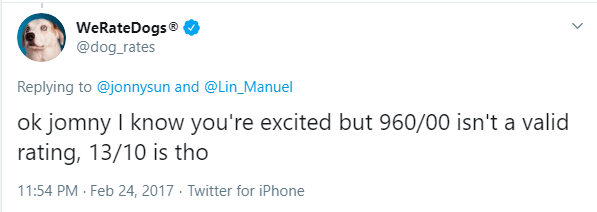

# Cleaning Action

In [53]:
### Copying Datasets
archive_copy=archive_df.copy(deep=True)
image_copy=image_predictions_df.copy(deep=True)
api_df_copy=api_df.copy(deep=True)

##### Archieved Table - Missing records in Expanded Url field
###### Define
- removing all 59 rows that includes empty data in "expanded_urls" as they have no images.


#### Code

In [54]:
archive_copy=archive_copy[archive_copy.expanded_urls.notnull()]

In [55]:
archive_copy.shape

(2297, 17)

#### Test

In [56]:
len(archive_copy)+59==2356

True

##### Thera are Records for tweets with False Predections at all 3 algorithms.
##### Define
 - For more accurate analysis all rows in image table that flagged as 'False' dog indicators in all p1,p2,and p3 columns will be dropped
##### Code 

In [57]:
results = image_copy[["p1_dog","p2_dog","p3_dog"]].apply(lambda x: x==False)
image_copy=image_copy[~results.all(axis=1)] #removing 305 records

##### Test

In [58]:
image_copy[results.all(axis=1)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [59]:
image_copy.shape

(1751, 12)

##### Image Table - Total records less than archived data set (image=2075,archived =2356),indicating no images for many records in archieved
##### Define
    - Removing tweets in Archieved table that have no images in image_predection table,utilizing Tweet_ids between the two tables.

In [60]:
# listing tweet_ids with images
have_image = list(image_copy.tweet_id.unique())
# Evaluating that all the tweets with images exist in the archived table
len(have_image) == archive_copy.tweet_id.isin(have_image).sum()

# Removing records with no images in archieved table
archive_copy = archive_copy[archive_copy.tweet_id.isin(have_image)]

##### Test

In [61]:
archive_copy.shape

(1751, 17)

In [62]:
#Both Tables should be identical in length now!
len(archive_copy)==len(image_copy)

True

##### Archieved Table - Not all tweets are organic and having images (Retweets and Replyies found)
##### Define
- Remove all rows having a data in the corresponding in_reply_to_status_id or retweeted_status_id

##### Code

In [63]:
# Extracting tweets that include data in the retweet_status_id.
retweeted = archive_copy.retweeted_status_id.notnull()
archive_copy[retweeted].shape[0] #65 records

#Dropping the retweets from the archived table
archive_copy = archive_copy[~retweeted]

#Extracting replies with the same method as the retweets
replied_tweet=archive_copy.in_reply_to_status_id.notnull()
archive_copy[replied_tweet].shape[0] #23 records
archive_copy = archive_copy[~replied_tweet]
archive_copy.shape

(1666, 17)

#### Test

In [64]:
len(archive_copy)+65+20==1751

True

##### Define
##### Now being Archived  table less than image table we need to re-evaluate image table using available current Archived  Tweet_ids

##### Code

In [65]:
# Checking extra tweet ids in image table not in the archive table
image_copy[np.logical_not(image_copy.tweet_id.isin(list(archive_copy.tweet_id)))]

# Dropping the retweets and replies from the image prediction table
image_copy=image_copy[~np.logical_not(image_copy.tweet_id.isin(list(archive_copy.tweet_id)))]

##### Test

In [66]:
image_copy.shape,archive_copy.shape

((1666, 12), (1666, 17))

##### Define
Invalid rating as per the site policy (i.e Zeros at denominator)
This record should be removed as it is not comply with the site policy
#### Code

In [67]:
#Checking if still the record available after executing  previous steps
archive_copy[archive_copy['rating_denominator']==0] 


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### Test

In [68]:
#Record were removed withon previous cleaning steps
archive_copy[archive_copy['tweet_id']==835246439529840640]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### Erroruneas name 'the' in the name column (8 Records)
##### Define
    - All records with 'the' to be replaced with null as checked on twitter and no names in status
#### Code

In [69]:
archive_copy['name'].replace('the',np.nan,inplace=True)

#### Test

In [70]:
len(archive_copy[archive_copy['name']=='the'])

0

#### Inaccurate Dog Names not valid Dog names (a,an)
##### Define
    -Re-Extract all names by using Regex methods,as it seems the name came aftern certain pattern of words with the dog name follows 'name..'
##### Code

In [71]:
name_pattern= re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_copy.iterrows():  
    try:
        if row['name'] == "a":
            extracted_name = re.findall(name_pattern, row['text'])[0]
            archive_copy.loc[index,'name'] = archive_copy.loc[index,'name'].replace('a', extracted_name)
        elif row['name'] == 'an':
            extracted_name = re.findall(name_pattern, row['text'])[0]
            archive_copy.loc[index,'name'] = archive_copy.loc[index,'name'].replace('an', extracted_name)
        elif row['name'] == 'None':
            extracted_name = re.findall(name_pattern, row['text'])[0]
            archive_copy.loc[index,'name'] = archive_copy.loc[index,'name'].replace('None', extracted_name)
    except IndexError:
        archive_copy.loc[index,'name'] = np.nan

#### Test

In [72]:
#Ensuring all a,an and None were corrected            
archive_copy.name.value_counts(dropna = False)
archive_copy.name.sort_values()

1021            Abby
1035            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
858            Alfie
1616           Alfie
2238           Alfie
367            Alfie
2235         Alfonso
2161         Alfredo
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
2316             NaN
2320             NaN
2321             NaN
2322             NaN
2323             NaN
2324             NaN
2327             NaN
2328             NaN
2329             NaN
2331             NaN
2332             NaN
2333             NaN
2335             NaN
2336             NaN
2339             NaN
2340             NaN
2341         

##### Time stamp not in datetime type - Archived Table
##### Define
    -convert timestampe from object to datetime datatype
#### Code    

In [73]:
archive_copy.timestamp=pd.to_datetime(archive_copy.timestamp)

##### Test

In [74]:
archive_copy.timestamp.dtype

dtype('<M8[ns]')

##### Tweets_id represented in integer datatype -Archieved table
##### Define
    -Convert Tweets_id from integer to string datatype as it will not be used in any arithmatic calculations.
    - Also this will be followed with API and Image_predection Tweet_id column change to string for Mergeing purposes.
#### Code    

In [75]:
#Archieved Table
archive_copy['tweet_id']=archive_copy['tweet_id'].astype(str)
#Image Predection Table
image_copy['tweet_id']=image_copy['tweet_id'].astype(str)
#API Table
api_df_copy['tweet_id']=api_df_copy['tweet_id'].astype(str)

##### Test

In [76]:
archive_copy.tweet_id.dtype,image_copy.tweet_id.dtype,api_df_copy.tweet_id.dtype

(dtype('O'), dtype('O'), dtype('O'))

### Tidness
##### API table not an observation unit
### Quality
##### overall record count is 2331 which is less than the original found in archieved 2356 indicating nonexicting Tweet_ids that is not available recently. (Should be compromised in Merging with Archieved table)
- Merging with Archieved table with inner join should complete the observational unit
##### Code

#### First , Dropping empty columns: in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp

In [77]:
archive_copy.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)

In [78]:
arch_api=pd.merge(archive_copy, api_df_copy, how='inner', on=['tweet_id'])

##### Test

In [79]:
arch_api.shape

(1659, 15)

In [80]:
arch_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 0 to 1658
Data columns (total 15 columns):
tweet_id              1659 non-null object
timestamp             1659 non-null datetime64[ns]
source                1659 non-null object
text                  1659 non-null object
expanded_urls         1659 non-null object
rating_numerator      1659 non-null int64
rating_denominator    1659 non-null int64
name                  1227 non-null object
doggo                 1659 non-null object
floofer               1659 non-null object
pupper                1659 non-null object
puppo                 1659 non-null object
retweet_count         1659 non-null int64
favorite_count        1659 non-null int64
followers_count       1659 non-null int64
dtypes: datetime64[ns](1), int64(5), object(9)
memory usage: 207.4+ KB


##### Quality Aspect
##### Archieved Tweets table
       Inconsistent representation in dog stages columns,as missing represented by 'None'
##### Define
    Replacing None with empty string ""
#### Code

In [81]:
stages=['doggo','floofer','pupper','puppo']
arch_api.puppo.replace('None',"")
arch_api[stages] =arch_api[stages].replace('None',"")

#### Test

In [82]:
arch_api.doggo.value_counts(),arch_api.floofer.value_counts(),arch_api.pupper.value_counts(),arch_api.puppo.value_counts()

(         1597
 doggo      62
 Name: doggo, dtype: int64,            1651
 floofer       8
 Name: floofer, dtype: int64,           1486
 pupper     173
 Name: pupper, dtype: int64,          1637
 puppo      22
 Name: puppo, dtype: int64)

### Tidy
##### Archieved Tweets table
   - Valuse are column names (i.e doggo,floofer,pupper,puppo)
##### Define
First combine all columns in one column then, Unifing dog_stage column to include all stages and drop old columns
#### Code

In [83]:
arch_api['dog_stage'] =arch_api[arch_api.columns[8:12]].apply(
    lambda x: ''.join(x.dropna().astype(str)),
    axis=1
)
arch_api.dog_stage=arch_api.dog_stage.replace(r''," ")
arch_api.dog_stage.value_counts()

                1403
pupper           166
doggo             53
puppo             21
doggopupper        7
floofer            7
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

In [84]:
arch_api.dog_stage.replace({'doggopupper':'doggo-pupper','doggofloofer':'doggo-floofer','doggopuppo':'doggo-puppo'},inplace=True)

In [85]:
arch_api.dog_stage.value_counts()
list(arch_api)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'retweet_count',
 'favorite_count',
 'followers_count',
 'dog_stage']

In [86]:
arch_api=arch_api.drop(['doggo','floofer','pupper','puppo'],axis=1)

#### Test

In [87]:
arch_api.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,followers_count,dog_stage
586,758355060040593408,2016-07-27 17:35:10,"<a href=""http://twitter.com/download/iphone"" r...",This is Corey. He's a Portobello Corgicool. Tr...,https://twitter.com/dog_rates/status/758355060...,11,10,Corey,1054,3369,8855819,
1348,674019345211760640,2015-12-08 00:15:09,"<a href=""http://twitter.com/download/iphone"" r...",This is Acro. You briefly see her out of the c...,https://twitter.com/dog_rates/status/674019345...,10,10,Acro,287,1076,8855774,
15,888917238123831296,2017-07-23 00:22:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Jim. He found a fren. Taught him how t...,https://twitter.com/dog_rates/status/888917238...,12,10,Jim,4019,26955,8855817,
902,706291001778950144,2016-03-06 01:31:11,"<a href=""http://twitter.com/download/iphone"" r...",When you're just relaxin and having a swell ti...,https://twitter.com/dog_rates/status/706291001...,11,10,NaN,469,1674,8855820,
1588,667509364010450944,2015-11-20 01:06:48,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This a Norwegian Pewterschmidt named Tickles. ...,https://twitter.com/dog_rates/status/667509364...,12,10,Tickles,1990,6428,8855775,


In [88]:
arch_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 0 to 1658
Data columns (total 12 columns):
tweet_id              1659 non-null object
timestamp             1659 non-null datetime64[ns]
source                1659 non-null object
text                  1659 non-null object
expanded_urls         1659 non-null object
rating_numerator      1659 non-null int64
rating_denominator    1659 non-null int64
name                  1227 non-null object
retweet_count         1659 non-null int64
favorite_count        1659 non-null int64
followers_count       1659 non-null int64
dog_stage             1659 non-null object
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 168.5+ KB


In [89]:
arch_api.fillna(np.nan)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,followers_count,dog_stage
0,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,5593,30872,8855817,
1,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,3705,23208,8855817,
2,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,7731,39003,8855817,
3,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,8332,37256,8855817,
4,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,2794,18779,8855817,
5,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,1813,10913,8855817,
6,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,16893,60179,8855817,
7,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,3848,25831,8855817,
8,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,6566,29501,8855817,doggo
9,890006608113172480,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,6559,28428,8855817,


In [90]:
arch_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1659 entries, 0 to 1658
Data columns (total 12 columns):
tweet_id              1659 non-null object
timestamp             1659 non-null datetime64[ns]
source                1659 non-null object
text                  1659 non-null object
expanded_urls         1659 non-null object
rating_numerator      1659 non-null int64
rating_denominator    1659 non-null int64
name                  1227 non-null object
retweet_count         1659 non-null int64
favorite_count        1659 non-null int64
followers_count       1659 non-null int64
dog_stage             1659 non-null object
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 168.5+ KB


#### Capitalization inconsistensy in predicted breeds in p1,p2 and p3 - image table
#### Define 
    - applying series.str.capitalize method
#### Code

In [91]:
image_copy['p1']=image_copy['p1'].str.capitalize()
image_copy['p2']=image_copy['p2'].str.capitalize()
image_copy['p3']=image_copy['p3'].str.capitalize()

##### Test

In [92]:
image_copy.p1.sample(5),image_copy.p2.sample(5),image_copy.p3.sample(5)

(111     Norwegian_elkhound
 1304                  Chow
 981       Golden_retriever
 1842        Great_pyrenees
 1394                  Chow
 Name: p1, dtype: object, 49               Toy_poodle
 1513               Cardigan
 1909    Rhodesian_ridgeback
 1687                  Boxer
 417                Pekinese
 Name: p2, dtype: object, 578                Collie
 1017            Chihuahua
 746            Toy_poodle
 788     Shetland_sheepdog
 1458       Siberian_husky
 Name: p3, dtype: object)

##### Non descriptive column names (p1,p2,p1_conf ...) - image table
##### Define
    -giving clear name to describe the column contents
###### Code    

In [93]:
list(image_copy)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [94]:
col_list = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
image_copy.columns=col_list

###### Test  

In [95]:
list(image_copy)

['tweet_id',
 'jpg_url',
 'img_num',
 'prediction_1',
 'confidence_1',
 'breed_1',
 'prediction_2',
 'confidence_2',
 'breed_2',
 'prediction_3',
 'confidence_3',
 'breed_3']

### Tidy-image table
#### Values are column names (i.e p1,p2,p3)
#### Define
    -values in p1,p2,and p3 need to be melted in one predection column
#### Code

In [96]:
#Reshaping
image_copy = pd.wide_to_long(image_copy, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

#### Test

In [97]:
image_copy.head()

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,Collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,Redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,Miniature_pinscher,0.074192,True


### End of Cleaning Stage

## Storing
   - Storing cleaned datasets twitter_archive_master and image_predection_cleaned

In [98]:
arch_api.to_csv('twitter_archive_master.csv',index=False,encoding='utf-8')
image_copy.to_csv('image-predictions-clean.csv',index=False,encoding='utf-8')

## Data Insights , Analysis and Visualizations

In [99]:
#Importing Data
df_archieve=pd.read_csv('twitter_archive_master.csv',dtype={'tweet_id': np.object})
df_prediction=pd.read_csv('image-predictions-clean.csv',dtype={'tweet_id': np.object})

In [100]:
#checking data
df_archieve.timestamp=pd.to_datetime(df_archieve.timestamp)
df_archieve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 12 columns):
tweet_id              1659 non-null object
timestamp             1659 non-null datetime64[ns]
source                1659 non-null object
text                  1659 non-null object
expanded_urls         1659 non-null object
rating_numerator      1659 non-null int64
rating_denominator    1659 non-null int64
name                  1227 non-null object
retweet_count         1659 non-null int64
favorite_count        1659 non-null int64
followers_count       1659 non-null int64
dog_stage             1659 non-null object
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 155.6+ KB


In [101]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 7 columns):
tweet_id            4998 non-null object
jpg_url             4998 non-null object
img_num             4998 non-null int64
prediction_level    4998 non-null int64
prediction          4998 non-null object
confidence          4998 non-null float64
breed               4998 non-null bool
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 239.2+ KB


### What is the User median followers over time?

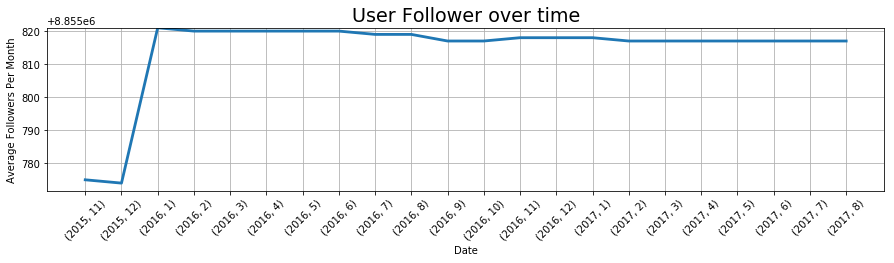

In [102]:
# Copying Archieved data to new arch_time df
arch_time=df_archieve.copy(deep=True)
arch_time.index = arch_time['timestamp']
arch_time.drop(columns=['timestamp'], inplace=True)
arch_time.sort_index(inplace=True)
avg_followers_month = arch_time.groupby([(arch_time.index.year),(arch_time.index.month)]).followers_count.median()
#Plotting time series
ax = plt.gca()
sns.set_context('poster')
avg_followers_month.plot(kind='line',x='timestamp',y='followers_count',ax=ax,figsize=(15,3))
plt.xticks(np.arange(22), avg_followers_month.index )
plt.xticks(rotation=45)
plt.ylim(ymax=avg_followers_month.max())
plt.xlabel('Date')
plt.ylabel('Average Followers Per Month')
plt.title('User Follower over time')
plt.grid()
plt.show();

### What are the top 10 breeds that have tweets

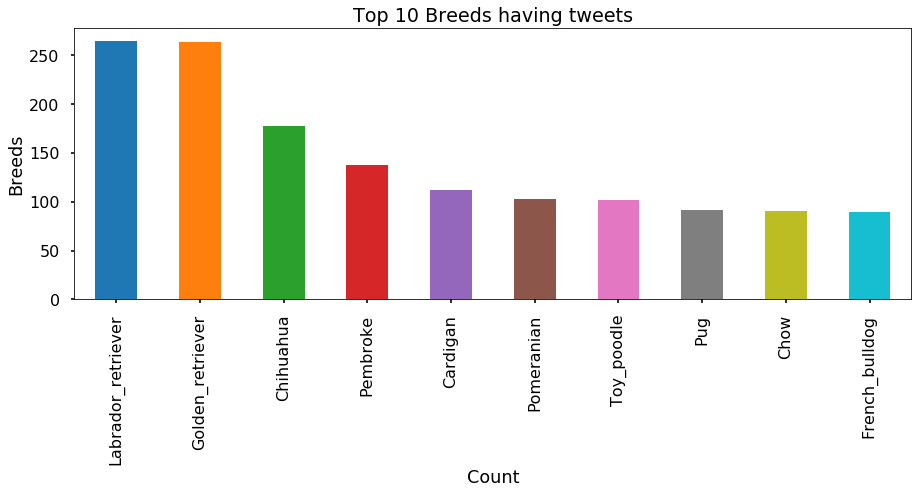

In [103]:
prediction_breed=df_prediction.copy(deep=True) # copying data
temp=prediction_breed.prediction.value_counts() # calculating counts
#plotting Top 10
top=temp.head(10)
top.plot(kind='bar',figsize=(15,5))
plt.title('Top 10 Breeds having tweets')
plt.ylabel('Breeds')
plt.xlabel('Count')
plt.show()

### Is there any correlation between dog to be liked and retweeted?

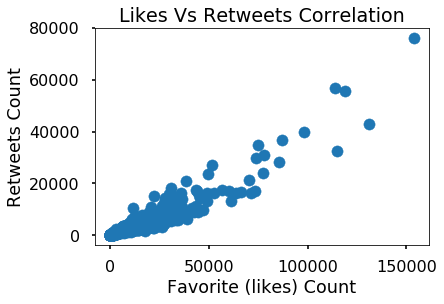

In [104]:
corr_arch=df_archieve.copy(deep=True)
plt.scatter(x=corr_arch.favorite_count,y=corr_arch.retweet_count)
plt.title('Likes Vs Retweets Correlation')
plt.xlabel('Favorite (likes) Count')
plt.ylabel('Retweets Count')
plt.show()

In [105]:
#Calculating Correlation Coeff.
correlation_x_y, p_value = stats.pearsonr(corr_arch.favorite_count, y=corr_arch.retweet_count)
correlation_x_y

0.9309172423952724

### End of Insights and Analysis Part